In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()


Decision Tree performance:
Mean squared error = 14.79
Explained variance score = 0.82

AdaBoost performance:
Mean squared error = 7.66
Explained variance score = 0.91


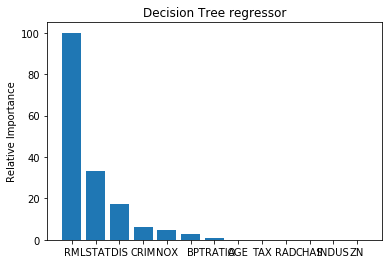

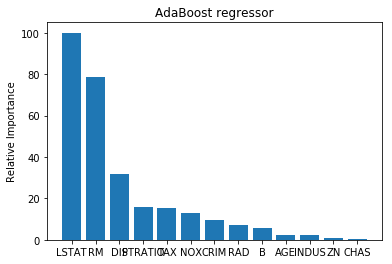

In [7]:
if __name__=='__main__':
    # Load housing data
    housing_data = datasets.load_boston() 

    # Shuffle the data
    X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.8 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]

    # Fit decision tree regression model
    dt_regressor = DecisionTreeRegressor(max_depth=4)
    dt_regressor.fit(X_train, y_train)

    # Fit decision tree regression model with AdaBoost
    ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
    ab_regressor.fit(X_train, y_train)

    # Evaluate performance of Decision Tree regressor
    y_pred_dt = dt_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_dt)
    evs = explained_variance_score(y_test, y_pred_dt) 
    print ("\nDecision Tree performance:")
    print ("Mean squared error =", round(mse, 2))
    print ("Explained variance score =", round(evs, 2))

    # Evaluate performance of AdaBoost
    y_pred_ab = ab_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_ab)
    evs = explained_variance_score(y_test, y_pred_ab) 
    print ("\nAdaBoost performance:")
    print ("Mean squared error =", round(mse, 2))
    print ("Explained variance score =", round(evs, 2))

    # Plot relative feature importances 
    plot_feature_importances(dt_regressor.feature_importances_, 
            'Decision Tree regressor', housing_data.feature_names)
    plot_feature_importances(ab_regressor.feature_importances_, 
            'AdaBoost regressor', housing_data.feature_names)
